## The Sparks Foundation - GRIP - Data Science & Business Analytics - November 2021
### Tasks 1 - Prediction using Supervised ML
### Author - Siddharth Kaithwas
#### Dataset Link - https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
#### Problem Statement - Predict the percentage of student based on the no. of study hours

## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Data

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)

## Exploratory Data Analysis

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape

(25, 2)

In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
data['Hours'].value_counts()

2.5    2
2.7    2
4.5    1
6.9    1
3.8    1
4.8    1
7.4    1
6.1    1
1.9    1
8.9    1
1.1    1
3.3    1
5.9    1
5.1    1
7.7    1
8.3    1
5.5    1
9.2    1
1.5    1
3.5    1
8.5    1
3.2    1
7.8    1
Name: Hours, dtype: int64

In [8]:
data['Scores'].value_counts()

30    3
21    1
41    1
76    1
35    1
54    1
69    1
67    1
24    1
95    1
17    1
42    1
62    1
47    1
85    1
25    1
81    1
60    1
88    1
20    1
75    1
27    1
86    1
Name: Scores, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualizing Data

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


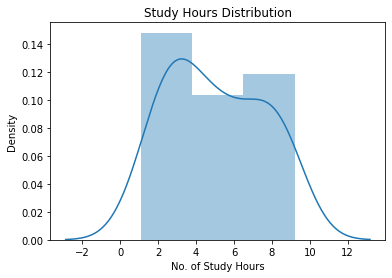

In [11]:
sns.distplot(data['Hours'])
plt.xlabel('No. of Study Hours')
plt.title('Study Hours Distribution')
plt.show()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


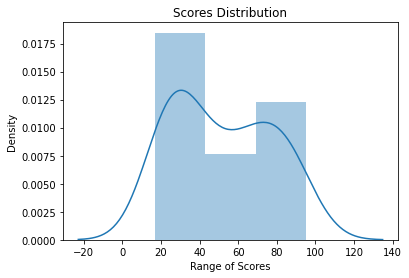

In [12]:
sns.distplot(data['Scores'])
plt.xlabel('Range of Scores')
plt.title('Scores Distribution')
plt.show()

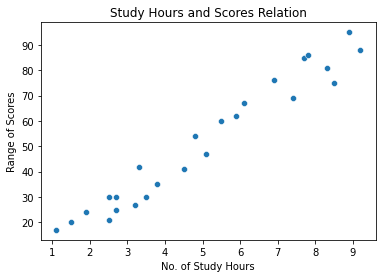

In [13]:
sns.scatterplot(data = data, x='Hours', y='Scores')
plt.xlabel('No. of Study Hours')
plt.ylabel('Range of Scores')
plt.title('Study Hours and Scores Relation')
plt.show()

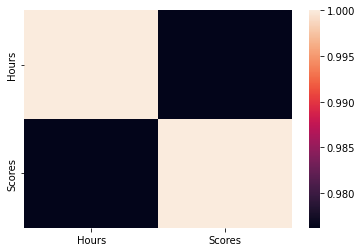

In [14]:
sns.heatmap(data.corr())
plt.show()

#### As the scores and hours are highly positively correlated and data have almost no outliers, linear regression model could give good results 

## Preparing Data for ML Algorithm

In [15]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Splitting Dependent and Independent Data

In [16]:
x = data.loc[:,['Hours']]
y = data.loc[:,['Scores']]

In [17]:
x.shape

(25, 1)

In [18]:
y.shape

(25, 1)

## Test Train Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [21]:
x_train.shape

(18, 1)

In [22]:
x_test.shape

(7, 1)

In [23]:
y_train.shape

(18, 1)

In [24]:
y_test.shape

(7, 1)

## Modeling

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_test)

In [29]:
y_pred

array([[12.87680681],
       [16.82638143],
       [26.700318  ],
       [62.24648963],
       [75.08260717],
       [56.32212769],
       [39.53643553]])

In [30]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Hours','Original Marks','Predicted Marks'])

,Hours,Original Marks,Predicted Marks
0,1.1,17.0,12.876807
1,1.5,20.0,16.826381
2,2.5,21.0,26.700318
3,6.1,67.0,62.246490
4,7.4,69.0,75.082607
5,5.5,60.0,56.322128
6,3.8,35.0,39.536436


## Model Evaluation

In [31]:
from sklearn.metrics import mean_squared_error,r2_score

In [32]:
print("Score:",model.score(x_test,y_pred))
print()
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))
print('r2 Score:',r2_score(y_test,y_pred))

Score: 1.0

Mean Squared Error: 21.895166431727358
r2 Score: 0.9531787049334625


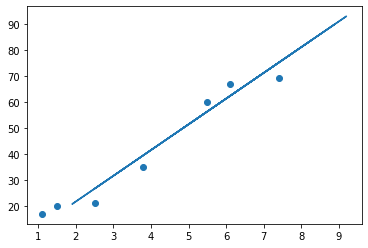

In [33]:
plt.scatter(x_test,y_test)
plt.plot(x_train, model.predict(x_train))

## Saving Model

In [34]:
import joblib
joblib.dump(model,'Marks_Prediction.pkl')

['Marks_Prediction.pkl']

## Loading Model

In [35]:
joblib.load('Marks_Prediction.pkl')

LinearRegression()

In [36]:
model.predict([[5]])[0][0]

51.38515941191046

In [37]:
model.predict([[8]])[0][0]

81.00696910878003